## Exploration of Image Transformations on RSNA Pneumonia Dataset


In [20]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

from config import load_config
from rsna_dataloader import RSNAPneumoniaDataModule
from transforms_select import PREPROCESS_TF, TRAIN_TF

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
CONFIG_PATH = "config.yml"
configs = load_config(CONFIG_PATH)
NUM_IMAGES = configs["inference"]["predict_size"] = 8
IMG_INDICES = [0,1,2,3,4,5,6,7]
IMG_INDEX = 3

rsna = RSNAPneumoniaDataModule(configs)
predict_dataloader = rsna.predict_dataloader(IMG_INDICES, transforms.ToTensor())
original_imgs = next(iter(predict_dataloader))


def plot_images_for_one_transform(batch, title):
    fig, ax = plt.subplots(1, NUM_IMAGES, figsize=(NUM_IMAGES*2, 2.5))
    fig.suptitle(title)
    for i in range(NUM_IMAGES):
        img = batch["image"][i].squeeze().permute(1,2,0)
        ax[i].set_title("Label: " + str(batch["target"][i].item()))
        ax[i].imshow(img, cmap="gray")
        ax[i].axis("off")


def plot_transforms(rsna, transforms, title, num_images=3, name_start_idx=0):
    num_transforms = len(transforms)
    fig, ax = plt.subplots(num_images, num_transforms, figsize=(num_transforms*2, num_images*2))
    fig.suptitle(title)
    
    for i, (trans_name, transform) in enumerate(transforms.items()):
        for j in range(num_images):
            dataloader = rsna.predict_dataloader(IMG_INDICES[:num_images], transform)
            batch = next(iter(dataloader))
            img = batch["image"][j].squeeze().permute(1,2,0)
            ax[j][i].set_title(trans_name[name_start_idx:])
            ax[j][i].imshow(img, cmap="gray")
            ax[j][i].axis("off")


DISTRIBUTION LABEL BY GENDER
label_rsna_pneumonia     False     True 
Patient Gender                          
F                     0.782775  0.217225
M                     0.768561  0.231439
#train:  20412
#val:    2269
#test:   4003


### 1. Original Images From Test Set

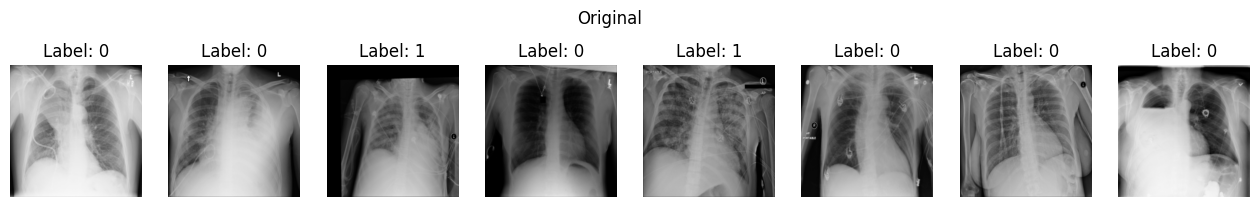

In [22]:
plot_images_for_one_transform(original_imgs, title="Original")

### 2. Preprocessing and Augmentation for Model Training

#### 2.1 Preprocessing: Resize + Center Crop
Resize to 256 then center crop to:
- Remove text along edges
- Focus more on lungs

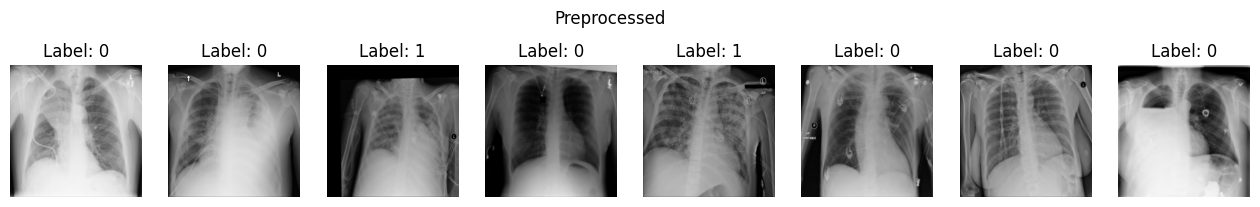

In [23]:
predict_dataloader = rsna.predict_dataloader(IMG_INDICES, PREPROCESS_TF)
preprocessed_imgs = next(iter(predict_dataloader))
plot_images_for_one_transform(preprocessed_imgs, title="Preprocessed")

#### 2.2 Augmentation: Rotation, Horizontal Flip, Resized Crop

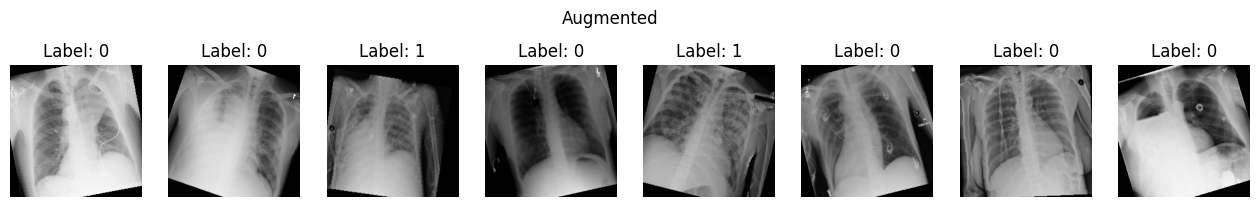

In [24]:
predict_dataloader = rsna.predict_dataloader(IMG_INDICES, TRAIN_TF)
augmented_imgs = next(iter(predict_dataloader))
plot_images_for_one_transform(augmented_imgs, title="Augmented")

### 3. Synthetic Data Shifts

#### 3.1 Blur

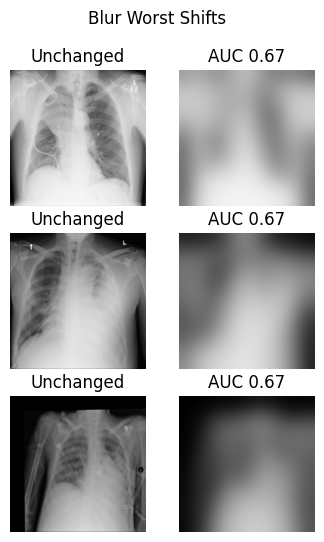

In [42]:
from transforms_select import BLUR_TF_EDGE
plot_transforms(rsna, BLUR_TF_EDGE, "Blur Worst Shifts", name_start_idx=5)

#### 3.2 Sharpen

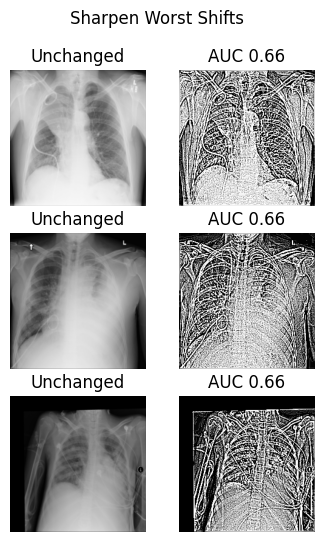

In [43]:
from transforms_select import SHARPEN_TF_EDGE
plot_transforms(rsna, SHARPEN_TF_EDGE, "Sharpen Worst Shifts", name_start_idx=8)

#### 3.3 Salt & Pepper Noise

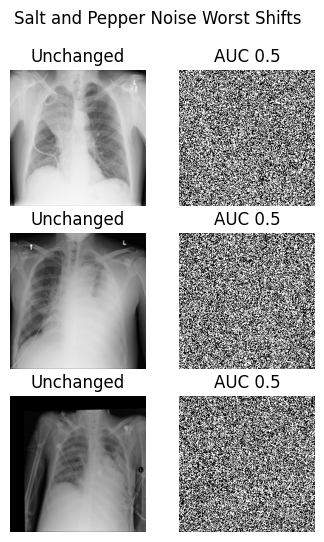

In [45]:
from transforms_select import SALT_PEPPER_NOISE_TF_EDGE
plot_transforms(rsna, SALT_PEPPER_NOISE_TF_EDGE, "Salt and Pepper Noise Worst Shifts", name_start_idx=18)

#### 3.4 Speckle Noise

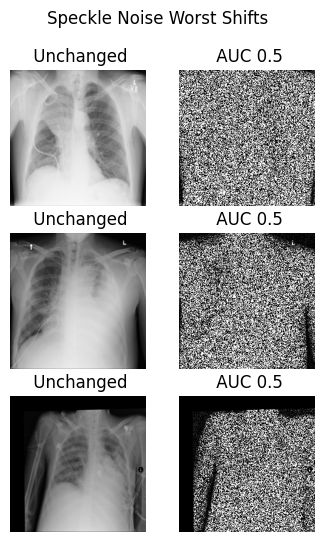

In [46]:
from transforms_select import SPECKLE_NOISE_TF_EDGE
plot_transforms(rsna, SPECKLE_NOISE_TF_EDGE, "Speckle Noise Worst Shifts", name_start_idx=13)

### 3.5 Contrast Increase

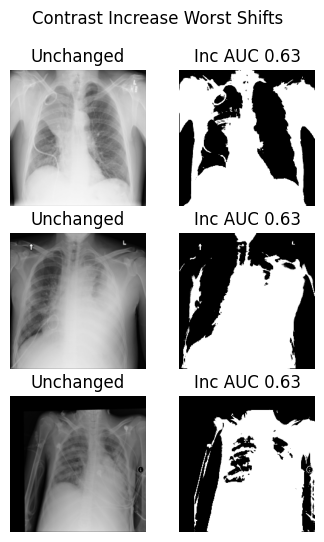

In [47]:
from transforms_select import CONTRAST_INC_TF_EDGE
plot_transforms(rsna, CONTRAST_INC_TF_EDGE, "Contrast Increase Worst Shifts", name_start_idx=9)

#### 3.6 Contrast Decrease

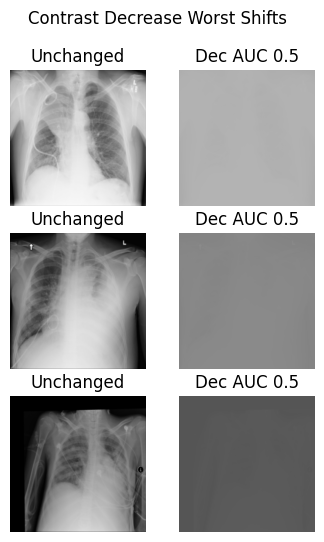

In [48]:
from transforms_select import CONTRAST_DEC_TF_EDGE
plot_transforms(rsna, CONTRAST_DEC_TF_EDGE, "Contrast Decrease Worst Shifts", name_start_idx=9)

#### 3.7 Gamma Increase

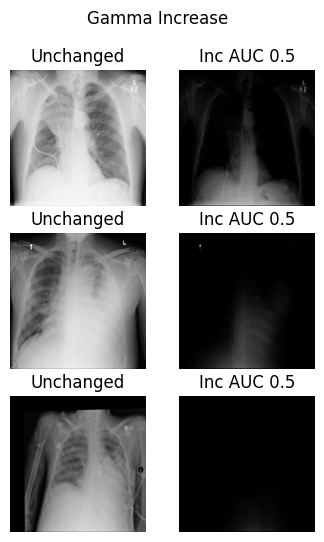

In [49]:
from transforms_select import GAMMA_INC_TF_EDGE
plot_transforms(rsna, GAMMA_INC_TF_EDGE, "Gamma Increase Worst Shifts", name_start_idx=6)

#### 3.8 Gamma Decrease

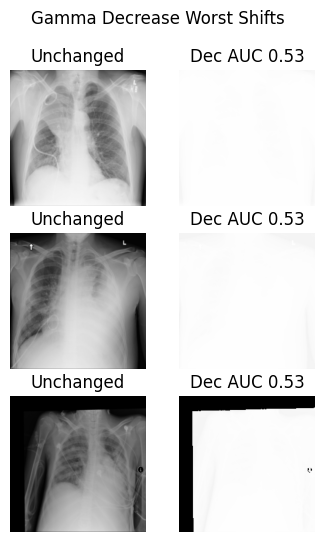

In [50]:
from transforms_select import GAMMA_DEC_TF_EDGE
plot_transforms(rsna, GAMMA_DEC_TF_EDGE, "Gamma Decrease Worst Shifts", name_start_idx=6)

#### 3.9 Magnify

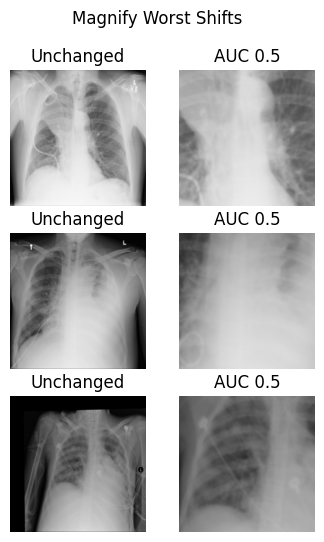

In [51]:
from transforms_select import MAGNIFY_TF_EDGE
plot_transforms(rsna, MAGNIFY_TF_EDGE, "Magnify Worst Shifts", name_start_idx=8)